# **Trabalho Final de Inteligência Artificial**

**Equipe:**

> Cinthia Maria Andrade da Silva - 471317

> Daniele Carnaúba Gonçalves - 473257

> Guilherme Sales Fernandes - 499756






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Contextualizando**

De acordo com o portaldotransito.com.br, o Brasil registrou 27.839 indenizações pagas por acidentes de trânsito com vítimas fatais entre janeiro e outubro de 2020. O país está entre os dez primeiros com maior número de mortes causadas por acidentes nas ruas, estradas e rodovias.

O Brasil é um dos membros comprometidos com a Década de Ação pela Segurança no Trânsito 2011- 2020 para reduzir em 50% as mortes em acidentes de trânsito para o fim deste ano. De acordo com Ministério da Saúde, o país acompanha de maneira efetiva as intenções do acordo desde 2015, quando as mortes por acidentes de trânsito começaram a reduzir.

Em 2020, os valores mostram inicialmente uma tendência de alta e, embora tenham caído o número de vítimas fatais no momento de maior distanciamento social, em setembro voltaram a aumentar.

A partir desse cenário, pensamos em desenvolver um modelo que classifique imagens e identifique se nela há ou não algum acidente de transito. Ou seja, usaremos classificação de imagens usando técnicas da CNN e categorizamos as imagens em se há ou não acidente.

### **Dados**

Para esse trabalho, buscamos por algum dataset que possuisse imagens com acidentes e sem acidentes, e então encontramos o seguinte repositório com exatamente isso: https://github.com/mghatee/Accident-Images-Analysis-Dataset, que possui uma pasta com Aciddent - Detection, que contem 2500 mil imagens com etiqueta Sem acidente, e 2398 mil imagens com label Com acidente, que é exatamente o que queríamos. Vamos para os modelos.

In [ ]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from sklearn.metrics import f1_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#altura e largura padrao das imagens
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
#a base de imagens com 4898 mil imagens que irei utilizar como meu dataset
base_dir = '/content/drive/MyDrive/UFC/inteligencia_artificial/acidentesDataSet/Accident -Detection' 

In [ ]:
datagen = ImageDataGenerator( rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # 80% - 20%
  ) # set validation split com normalização 

#para mostrarmos exemplo das imagens
model_exemple = datagen.flow_from_directory(base_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='binary') 

Found 4898 images belonging to 2 classes.


###**Exemplo das duas classes de imagens da minha base de imagens**

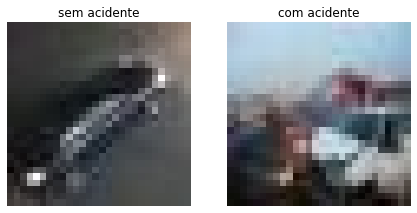

In [ ]:
import cv2
class_names = ['sem acidente', "com acidente"]

labels =  ["1", '2']

fig = plt.figure(figsize=(23,25))
m = 0
for i in list(model_exemple.class_indices.values()):
  m += 1
  for n in range(0,model_exemple.samples):
    if model_exemple.classes[n] == i:
      img = model_exemple.filepaths[n]
      fig.add_subplot(6,6,m)
      plt.title(class_names[i])
      plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)) 

      plt.axis('off')
      break
plt.show()


 ### Vamos usar 80% das imagens para treinamento e 20% para validação.

In [ ]:
train_ds = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 



Found 3919 images belonging to 2 classes.


In [ ]:
val_ds = datagen.flow_from_directory(
    base_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') 

Found 979 images belonging to 2 classes.


### **Criando o modelo**

Nosso primeiro modelo terá dois blocos de convolução com uma camada máxima de pool em cada um deles.


In [ ]:
#inspirado na arquitetura LeNet-5
cnn1 = Sequential([
    layers.Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') 
])


In [ ]:
cnn1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

Treinando o modelo

In [ ]:
epochs=10
history = cnn1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
123/123 [==============================] - 544s 4s/step - loss: 0.6790 - accuracy: 0.5792 - precision: 0.5496 - recall: 0.7796 - val_loss: 0.4884 - val_accuracy: 0.7978 - val_precision: 0.8215 - val_recall: 0.7495
Epoch 2/10
123/123 [==============================] - 118s 960ms/step - loss: 0.4913 - accuracy: 0.7635 - precision: 0.7451 - recall: 0.7858 - val_loss: 0.3451 - val_accuracy: 0.8550 - val_precision: 0.8503 - val_recall: 0.8539
Epoch 3/10
123/123 [==============================] - 118s 960ms/step - loss: 0.4247 - accuracy: 0.8017 - precision: 0.7858 - recall: 0.8181 - val_loss: 0.4008 - val_accuracy: 0.8243 - val_precision: 0.9050 - val_recall: 0.7161
Epoch 4/10
123/123 [==============================] - 118s 959ms/step - loss: 0.3988 - accuracy: 0.8219 - precision: 0.8107 - recall: 0.8301 - val_loss: 0.4139 - val_accuracy: 0.8090 - val_precision: 0.9534 - val_recall: 0.6409
Epoch 5/10
123/123 [==============================] - 127s 1s/step - loss: 0.3757 - accurac

### Avaliação e plots do modelo



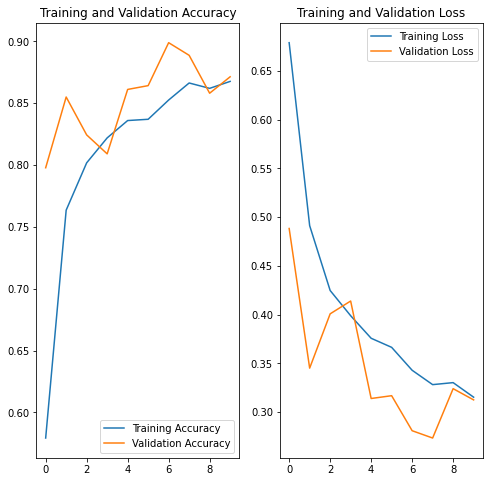

Média - treino loss  40.52339196205139 %
Média - val loss  34.693564772605896 %
Média - treino acurácia  80.87522327899933 %
Média - val acurácia  85.28089940547943 %
F1-Score:  81.5651082881688 %
Recall:  83.5591447353363 %
Precision:  79.66402411460876 %


In [ ]:
--# visualizing losses and accuracy
import statistics

xc = range(epochs)

precision = statistics.mean(history.history['precision'])
recall = statistics.mean(history.history['recall'])

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

f1_score = 2*(precision*recall)/(precision+recall)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Média - treino loss ", statistics.mean(train_loss)*100, "%")
print("Média - val loss ", statistics.mean(val_loss)*100, "%")
print("Média - treino acurácia ", statistics.mean(train_acc)*100, "%")
print("Média - val acurácia ", statistics.mean(val_acc)*100, "%")

print("F1-Score: ", f1_score*100, "%")
print("Recall: ", recall*100, "%")
print("Precision: ", precision*100, "%")

In [ ]:
import pylab
from scipy import misc

class_labels = ['sem acidente', "com acidente"]
def plot_image( predictions_array, true_label, img, teste):

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv2.cvtColor(cv2.imread(teste), cv2.COLOR_BGR2RGB)) 

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [ ]:
predictions = cnn1.predict(val_ds)

In [ ]:

score = predictions[0]
class_labels = ['sem acidente', "com acidente"]
print(np.argmax(predictions[0]))

print(
    "Esta imagem provavelmente pertence a  label: '{}' com uma confiança de {:.2f} %."
    .format(class_labels[np.argmax(score)], 100 * np.max(score))
)
np.argmax(predictions[0])


0
Esta imagem provavelmente pertence a  label: 'sem acidente' com uma confiança de 33.86 %.


0

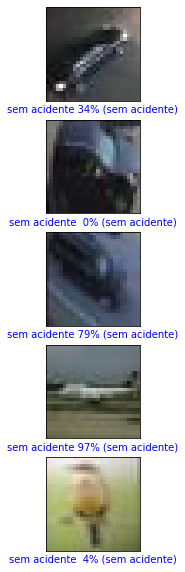

In [ ]:
num_images = 5*1
plt.figure(figsize=(2*2*1, 2*5))
for i in range(num_images):
  plt.subplot(5, 2*1, 2*i+1)
  plot_image(predictions[i], val_ds.classes[i] , val_ds[i],val_ds.filepaths[i])

plt.show()

### **Conclusão**

Como podemos ver a média da precisão do treinamento e da precisão da validação estão erradas por uma pequena margem,
 e o modelo atingiu cerca de 70% de precisão no conjunto de validação.

E sobre a perda, podemos observar que a perda de treinamento fica menor que a validation loss, e as duas estão bem baixas, o que é um bom sinal, pois nosso intuito é fazer com que a perda de validação seja a mais baixa possível.

Desenvolvendo sobre o resultado das métricas podemos discorrer que: 

- Loss: No loss, ajuste dos erros, podemos ver muito claramente o ponto onde a evolução das épocas começou a influênciar muito pouco nos resultados, vemos que depois da execução da primeira época os valores pouco variaram. Tivemos um início muito bom.

- Acurácia: É uma métroca muito simples, serve como base de cálculo para várias outras. Basicamente, ela descreve o quão frequentemente o nosso classificador executa a predição correta, nesse projeto é bem mais simples sua execução visto a natureza binária do problema. 

- F1-Score: É uma média muito comum na análise de desempenho de redes neurais por oferecer uma visualização das métricas Recall e Precision de uma vez só. Basicamente o F1-Score é a média harmônica das métricas citadas. O Recall muito interessante, basicamente ela funciona para combater situações de Falsos Negativos e para modelos específicos, como reconhecimento de câncer e doenças no geral, é muito sério que acontece isso, por isso a importância de manter um valor elevado aqui, mesmo que isso custe alguns Falsos Positivos. A precisão é a modelagem do extremo oposto, lidar com situações onde o Falso Positivo é pior do que o Falso Negativo, por exemplo em um cenário de avaliação de investimentos.